<a href="https://colab.research.google.com/github/alina-bogdanovskaya/PyTorch_Jan2023/blob/lesson8/HW08.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

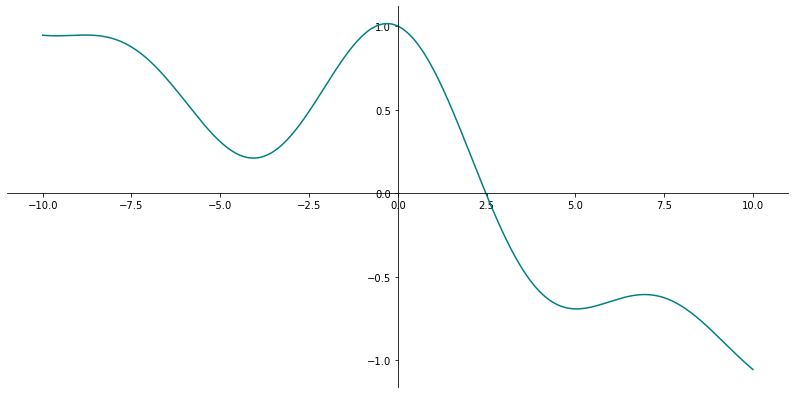

In [2]:
x = np.linspace(-10, 10, 2048)
y = (np.sin(x)/x) - (x/10)

fig = plt.figure(figsize=(14, 7))
ax = fig.add_subplot(1, 1, 1)
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

plt.plot(x, y, 'teal')
plt.show()

In [3]:
import torch
from torch import nn
from torch.utils.data import DataLoader

In [4]:
torch.manual_seed(736)

train_data_length = len(x)
train_data = torch.zeros((train_data_length, 2))
train_data[:, 0] = torch.from_numpy(x)
train_data[:, 1] = torch.from_numpy(y)
train_labels = torch.zeros(train_data_length)
train_set = [(train_data[i], train_labels[i]) for i in range (train_data_length)]

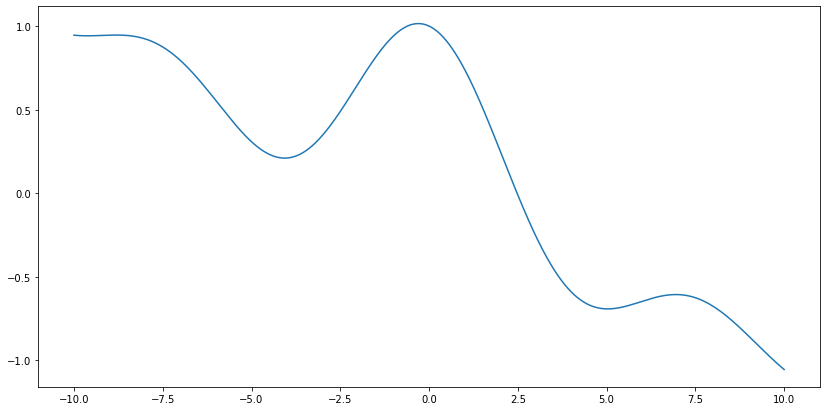

In [5]:
fig = plt.figure(figsize=(14, 7))
plt.plot(train_data[:, 0], train_data[:, 1], '-');

In [6]:
batch_size = 32
train_dl = DataLoader(train_set, batch_size=batch_size, shuffle=True) 

In [7]:
class Discriminator(nn.Module):
  def __init__(self):
    super().__init__()
    
    self.model = nn.Sequential(
        nn.Linear(2, 256),
        nn.LeakyReLU(0.2),
        nn.Dropout(0.25),
        nn.Linear(256, 128),
        nn.LeakyReLU(0.2),
        nn.Dropout(0.3),
        nn.Linear(128, 64),
        nn.LeakyReLU(0.2),
        nn.Dropout(0.2),
        nn.Linear(64, 32),
        nn.LeakyReLU(0.2),
        nn.Dropout(0.1),
        nn.Linear(32, 1),
        nn.Sigmoid()
    )

  def forward(self, x):
    output = self.model(x)
    return output

In [8]:
class Generator(nn.Module):
  def __init__(self):
    super().__init__()
    self.model = nn.Sequential(
        nn.Linear(2, 16),
        nn.LeakyReLU(0.2),
        nn.Linear(16, 32),
        nn.LeakyReLU(0.2),
        nn.Linear(32, 64),
        nn.LeakyReLU(0.2),
        nn.Linear(64, 2),
        )

  def forward(self, x):
    output = self.model(x)
    return output

In [9]:
D = Discriminator()
G = Generator()

In [10]:
lr = 0.0005
num_epochs = 500
criterion = nn.BCELoss()
optimizer_d = torch.optim.Adam(D.parameters(), lr=lr)
optimizer_g = torch.optim.Adam(G.parameters(), lr=lr)

Epoch: 0 Loss D.: 0.33054423332214355, Loss G.: 0.8290557265281677


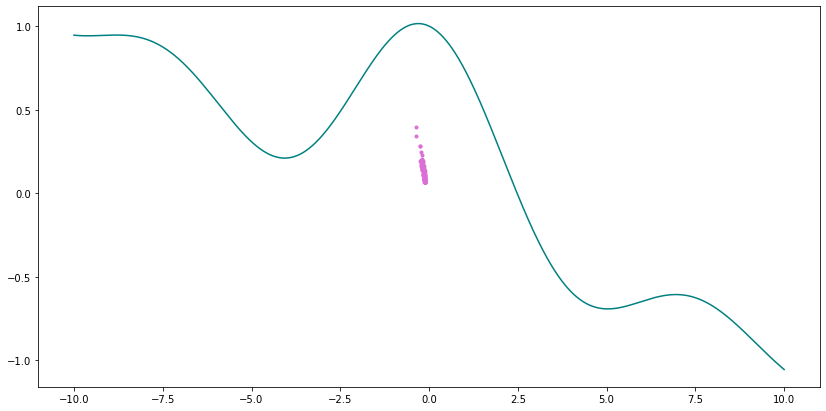

Epoch: 50 Loss D.: 0.6084433794021606, Loss G.: 0.884736180305481


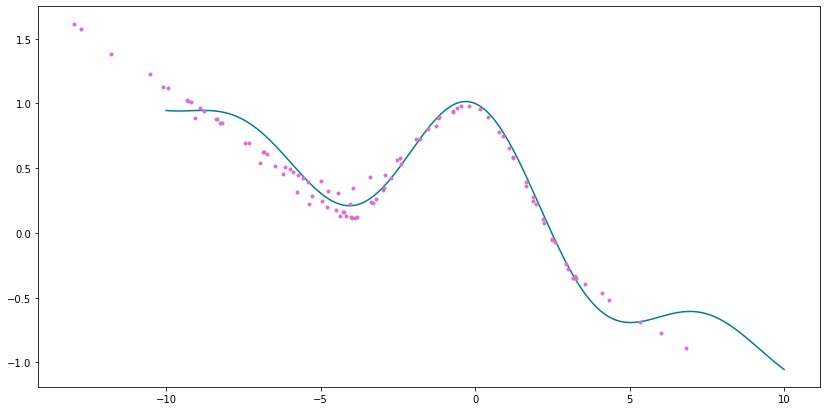

Epoch: 100 Loss D.: 0.676967978477478, Loss G.: 0.8325108289718628


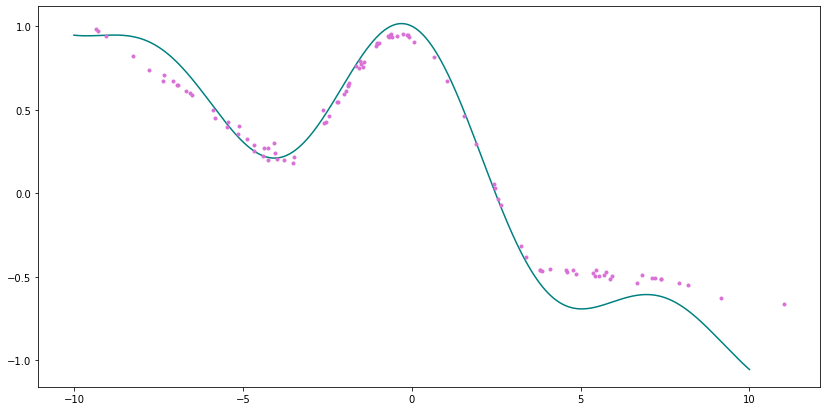

Epoch: 150 Loss D.: 0.7231761813163757, Loss G.: 0.6979448795318604


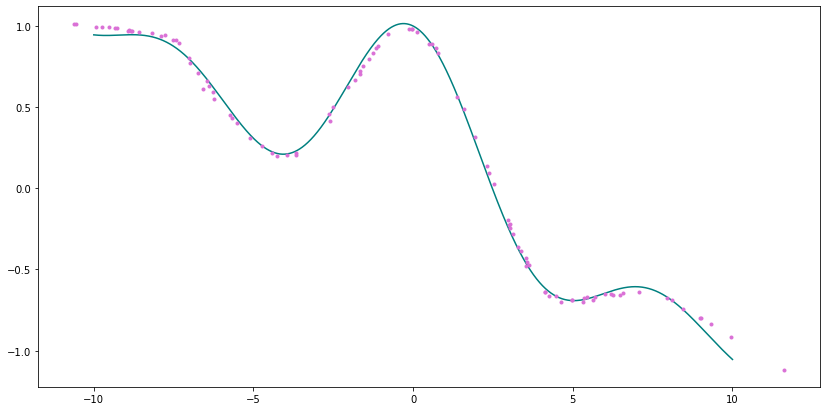

Epoch: 200 Loss D.: 0.6816750168800354, Loss G.: 0.6755605936050415


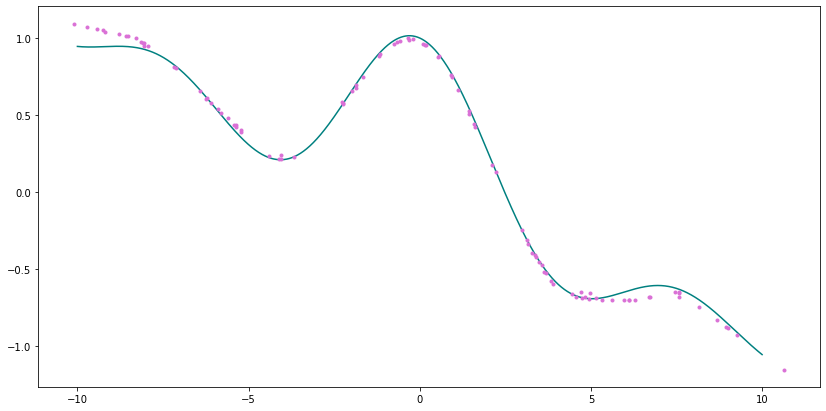

Epoch: 250 Loss D.: 0.6961454153060913, Loss G.: 0.7160555124282837


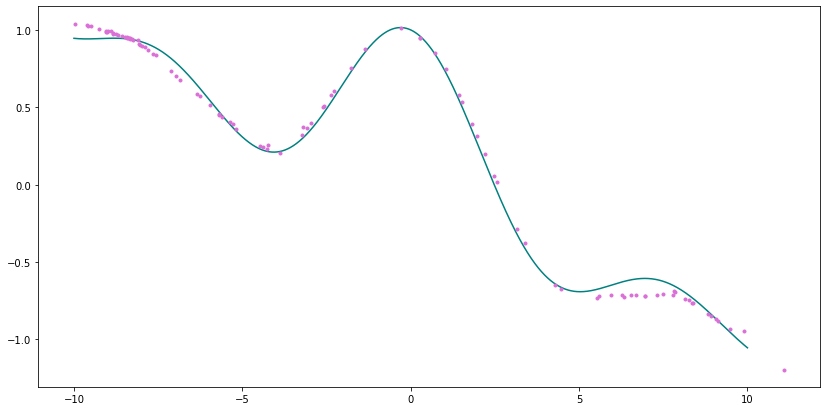

Epoch: 300 Loss D.: 0.6892003417015076, Loss G.: 0.6925670504570007


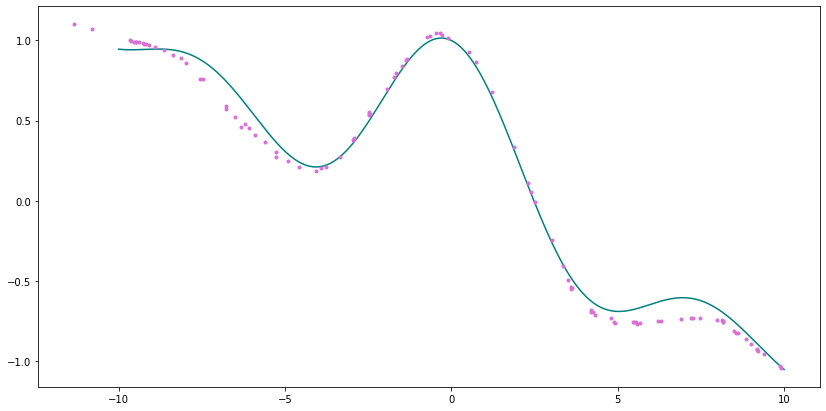

Epoch: 350 Loss D.: 0.6944348216056824, Loss G.: 0.6840157508850098


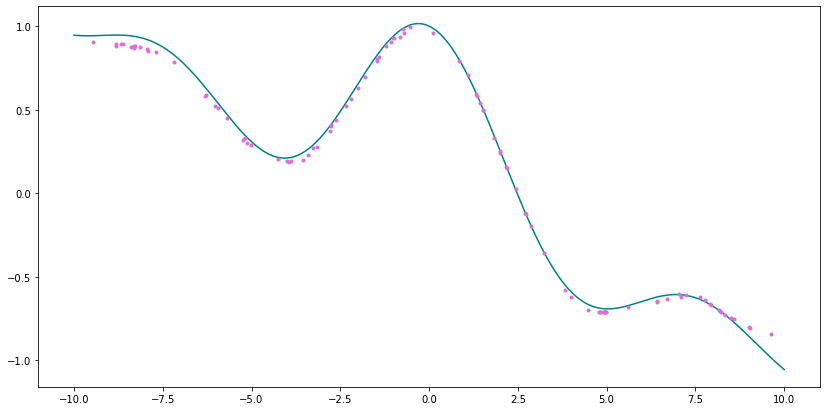

Epoch: 400 Loss D.: 0.6891496181488037, Loss G.: 0.6841078996658325


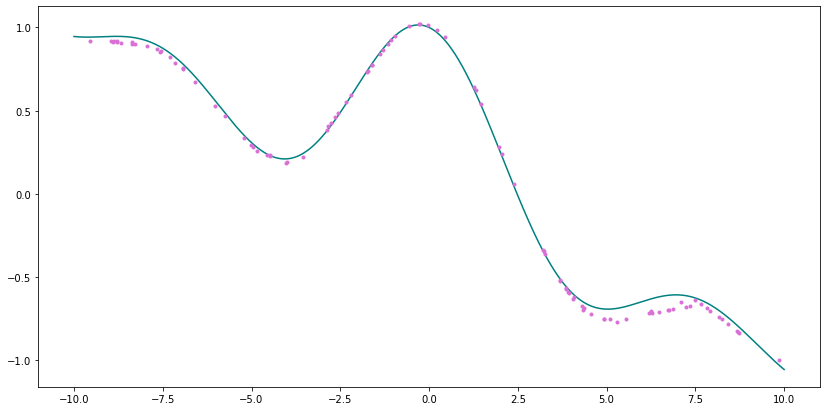

Epoch: 450 Loss D.: 0.682706356048584, Loss G.: 0.6994640231132507


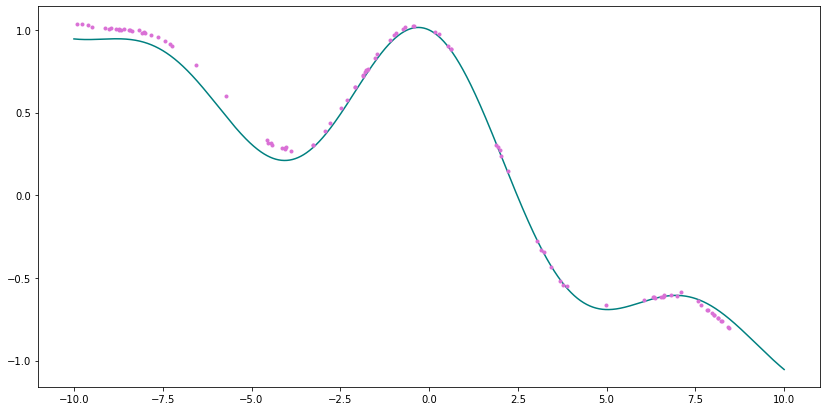

Epoch: 500 Loss D.: 0.6911354064941406, Loss G.: 0.6828302145004272


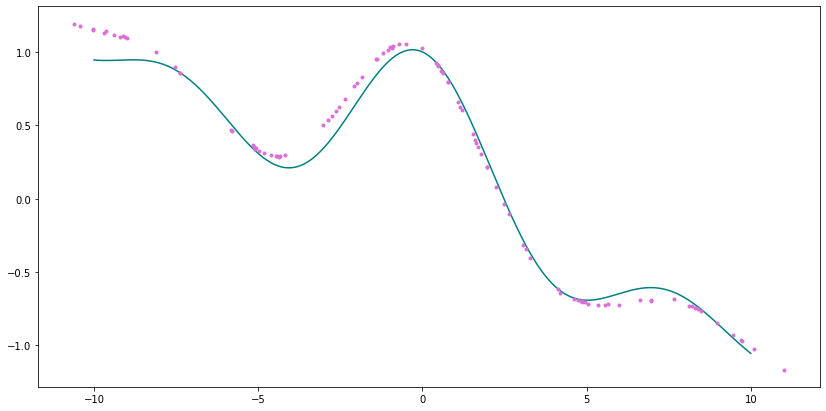

In [11]:
for epoch in range(num_epochs + 1):
  for n, (real_samples, _) in enumerate(train_dl):
    # Data for training the discriminator
    real_samples_labels = torch.ones((batch_size, 1))
    latent_space_samples = torch.randn((batch_size, 2))
    generated_samples = G(latent_space_samples)
    generated_samples_labels = torch.zeros((batch_size, 1))
    all_samples = torch.cat((real_samples, generated_samples))
    all_samples_labels = torch.cat((real_samples_labels, generated_samples_labels))

    # Training the discriminator
    D.zero_grad()
    output_d = D(all_samples)
    loss_d = criterion(output_d, all_samples_labels)
    loss_d.backward()
    optimizer_d.step()

    # Data for training the generator
    latent_space_samples = torch.randn((batch_size, 2))

    # Training the generator
    G.zero_grad()
    generated_samples = G(latent_space_samples)
    output_d_generated = D(generated_samples)
    loss_g = criterion(output_d_generated, real_samples_labels)
    loss_g.backward()
    optimizer_g.step()

    # Show loss and plots
    if epoch % 50 == 0 and n == batch_size - 1:
      print(f"Epoch: {epoch} Loss D.: {loss_d}, Loss G.: {loss_g}")
      
      latent_space_samples = torch.randn(100, 2)
      generated_samples = G(latent_space_samples)
      generated_samples = generated_samples.detach()
      
      fig = plt.figure(figsize=(14, 7))
      plt.plot(x, y, 'teal')
      plt.plot(generated_samples[:, 0], generated_samples[:, 1], ".", color = 'orchid')
      plt.show()
  